In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [146]:
wake_angle = math.radians(19.28)

class Swimmer:
    
    def __init__(self, x_0,y_0,theta,v):
        
        self.x = x_0
        self.y = y_0
        self.v = v
        self.theta = theta
        self.vx = self.v * math.cos(theta)
        self.vy = self.v * math.sin(theta)
        self.log = [(self.x, self.y)]
        self.dist_log = []
        self.wake_log = []
        
    def dist(self, x, y):
        return (x**2 + y**2)**0.5
        
    def update(self):
        self.x += self.vx
        self.y += self.vy
        
        self.wake()
        self.log.append((self.x, self.y))
        self.dist_log.append(self.dist(self.vx, self.vy))
        
    def lead(self, time):
        [self.update() for i in range(time)]
        
    def follow(self, coords):
        
        for coord in coords:
            
            self.theta = math.atan((coord[1] - self.y) / (coord[0] - self.x))
            self.vx = self.v * math.cos(self.theta)
            self.vy = self.v * math.sin(self.theta)
            self.update()
     
    def wake(self):
        x_coords = [self.x]
        y_coords = [self.y, 0]
        wake_width = math.tan(wake_angle)*self.y
        x_intercept = self.x - wake_width
        x_coords.append(x_intercept)
        self.wake_log.append((x_coords, y_coords))
                    
    def plot(self, style='b-'):
        coords = zip(*self.log)
        plt.scatter(coords[0],coords[1],s=2)
        
    def plot_wake(self):
        for i, wake in enumerate(self.wake_log):
            plt.plot(wake[0],wake[1], color='cornflowerblue',linestyle='dashed',linewidth=1)


steps = 113
v = 1
her = Swimmer(100,0,math.pi/2,v)

her.lead(steps)
him = Swimmer(0,0,0,v)
him.follow(her.log)

In [151]:
def wake_intercept(follower_log, wake_log):
    
    for pos, wake in zip(follower_log, wake_log):
        
        # Coords of following swimmer
        x = pos[0]
        y = pos[1]
        
        # x intercept of wake boundary
        x_0 = wake[0][1]
        
        slope = math.tan(math.pi/2 - wake_angle)
    
        if x > x_0:
            if y < slope * (x-x_0):
                return x,y
    
    return False


        
w = wake_intercept(him.log,her.wake_log)
w

(82.81544024799547, 63.232889294621735)

In [152]:
w_index = him.log.index(w)

In [153]:
z = her.log[w_index]

In [154]:
((z[0] - w[0])**2+(z[1]-w[1])**2)**0.5

51.70628762946372

<IPython.core.display.Javascript object>


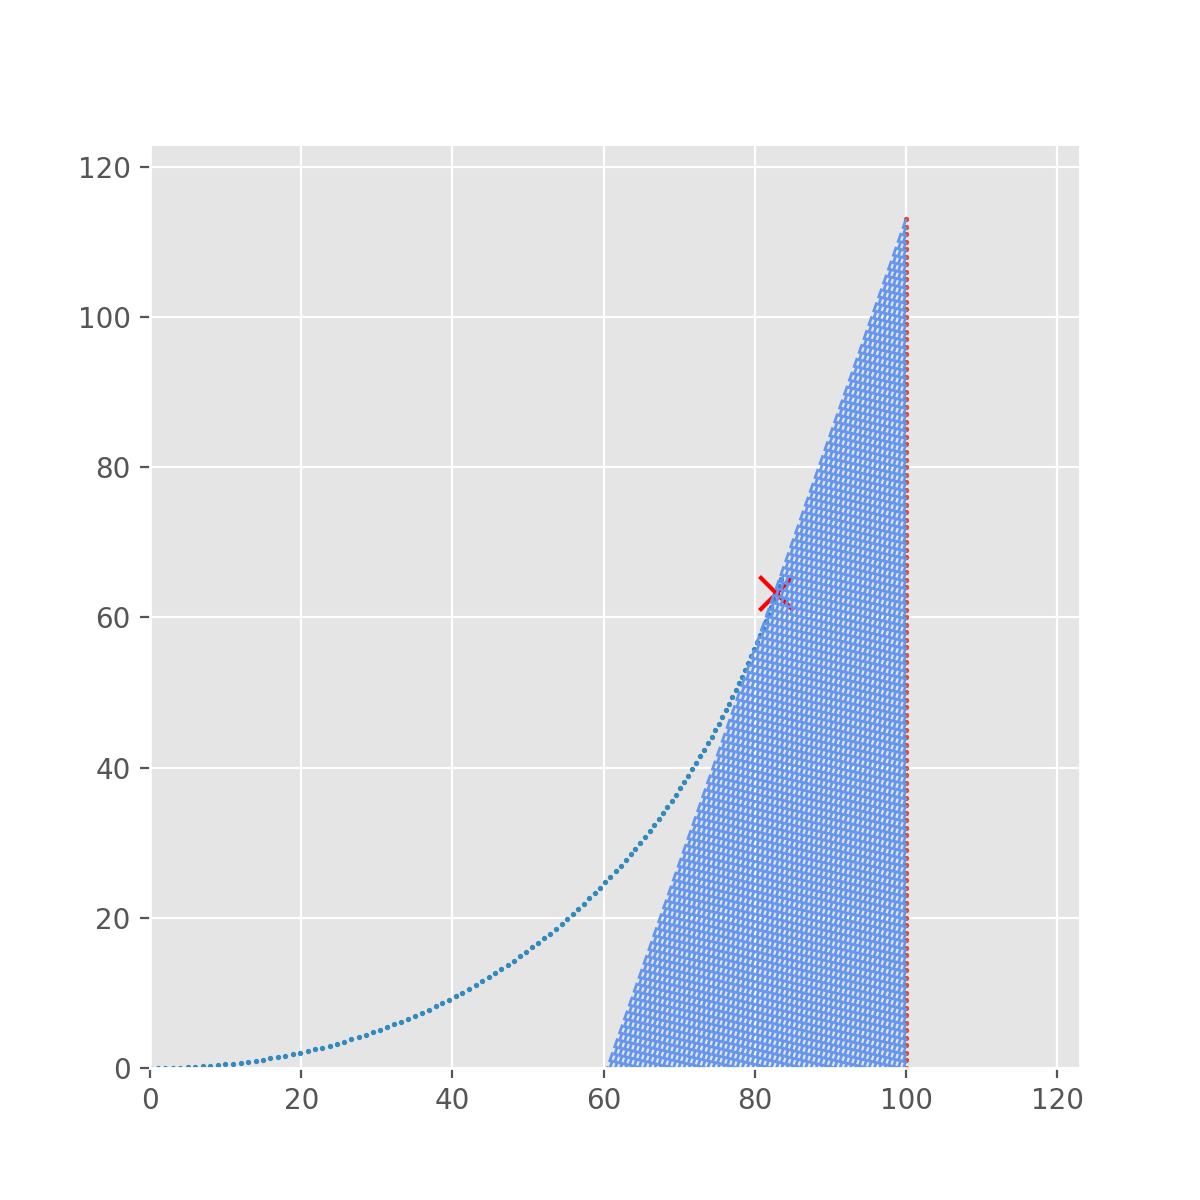

In [155]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(6,6))
plt.xlim([0,steps+10])
plt.ylim([0,steps+10])
her.plot('bo')
her.plot_wake()
him.plot('ro')

plt.scatter(*w, color='red',marker='x',s=150)

In [121]:
plt.scatter?